### Load csv file

In [1]:
import pandas as pd
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Remove comma on column Description

In [2]:
df['Description'] = df['Description'].str.replace(r'[^\w\s]+', '')
df['Description']

0           WHITE HANGING HEART TLIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDRENS APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

### Check info of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Column CustomerID and Description has missing values
#### So we count all of it and use dropna() to drop them

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Drop NA values

In [5]:
df = df.dropna()

### Then, we use describe() to show details of data, make sure that there is nothing out of the ordinary in this data set

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### As we see
- Negative quantity is not valid, it means something wrong in this data set, or maybe that is customer's cancel after purchase.
- UnitPrice equal 0 means maybe that is complimentary gift.
#### => Both may not affect our goal in this project which is to predict future customer purchasing behavior. So, we drop them to ensure integrity and reasonableness of the data set.

In [7]:
# df = df.drop(df[df["Quantity"] <= 0].index)
# df = df.drop(df[df["UnitPrice"] <= 0].index)
# df

## There are several types of peculiar transactions and list all special Stock Codes

In [8]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [9]:
df[df['StockCode'].apply(lambda x: x in list_special_codes)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany


In [10]:
df = df[~df['StockCode'].isin(list_special_codes)].sort_index()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDRENS APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Generate Total Price columns based on Quantity and UnitPrice, after that, drop Quantity and UnitPrice column

In [11]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df = df.drop(columns=['Quantity','UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,12/1/2010 8:26,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,12/1/2010 8:26,17850.0,United Kingdom,20.34


### CustomerID must be Integer, so we transform float into int

In [12]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')


### In this dataset, there are transactions where the customer cancels the order. That means that the transactions when the customer orders must also be processed or dropped according to the canceled transactions. This is to ensure that revenue statistics will not be affected by those transactions

In [13]:
df1 = df.groupby(["Description","CustomerID","Country",])["Total Price"].sum().reset_index()
df1 

,Description,CustomerID,Country,Total Price
0,4 PURPLE FLOCK DINNER CANDLES,12937,United Kingdom,2.55
1,4 PURPLE FLOCK DINNER CANDLES,12940,United Kingdom,2.55
2,4 PURPLE FLOCK DINNER CANDLES,12953,United Kingdom,15.30
3,4 PURPLE FLOCK DINNER CANDLES,13949,United Kingdom,9.48
4,4 PURPLE FLOCK DINNER CANDLES,14071,United Kingdom,0.79
...,...,...,...,...
268398,ZINC WIRE SWEETHEART LETTER TRAY,17530,United Kingdom,3.75
268399,ZINC WIRE SWEETHEART LETTER TRAY,17706,United Kingdom,37.50
268400,ZINC WIRE SWEETHEART LETTER TRAY,17812,United Kingdom,3.75
268401,ZINC WIRE SWEETHEART LETTER TRAY,17835,United Kingdom,6.25


In [14]:
df_merge = df[["InvoiceNo", "StockCode","Description", "InvoiceDate", "CustomerID"]].sort_values(by="CustomerID",ascending=True)
df_merge

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:17:00,12346
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:01:00,12346
148302,549222,21731,RED TOADSTOOL LED NIGHT LIGHT,2011-04-07 10:43:00,12347
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,2011-10-31 12:25:00,12347
428972,573511,22697,GREEN REGENCY TEACUP AND SAUCER,2011-10-31 12:25:00,12347
...,...,...,...,...,...
198716,554065,22755,SMALL PURPLE BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287
198717,554065,22754,SMALL RED BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287
198718,554065,22753,SMALL YELLOW BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287
392739,570715,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,2011-10-12 10:23:00,18287


### I merge 2 data frames to combined multi columns need to use later

In [15]:
df2 = pd.merge(df1,df_merge,how='outer')
df2

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate
0,4 PURPLE FLOCK DINNER CANDLES,12937,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00
1,4 PURPLE FLOCK DINNER CANDLES,12940,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00
2,4 PURPLE FLOCK DINNER CANDLES,12953,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00
3,4 PURPLE FLOCK DINNER CANDLES,13949,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00
4,4 PURPLE FLOCK DINNER CANDLES,14071,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00
...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00


In [16]:
df_negative = df1[df1["Total Price"] <= 0]
df_negative

,Description,CustomerID,Country,Total Price
159,DOLLY GIRL BEAKER,12940,United Kingdom,-1.25
505,SET 2 TEA TOWELS I LOVE LONDON,15128,United Kingdom,0.00
659,SPACEBOY BABY GIFT SET,15810,United Kingdom,0.00
667,SPACEBOY BABY GIFT SET,16360,United Kingdom,0.00
714,TRELLIS COAT RACK,15993,United Kingdom,0.00
...,...,...,...,...
267553,ZINC METAL HEART DECORATION,13394,United Kingdom,0.00
267911,ZINC SWEETHEART WIRE LETTER RACK,17716,United Kingdom,0.00
268209,ZINC TLIGHT HOLDER STARS SMALL,17504,United Kingdom,0.00
268228,ZINC TOP 2 DOOR WOODEN SHELF,14217,United Kingdom,0.00


### After calculating total price based on CustomerID and StockCode. Then, drop the data with total price <= 0 (because it includes unreasonable transactions with order cancellation data even though there is no previous order data)

In [17]:
df3= df2[~df2["Total Price"].isin(df_negative["Total Price"])]
df3

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate
0,4 PURPLE FLOCK DINNER CANDLES,12937,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00
1,4 PURPLE FLOCK DINNER CANDLES,12940,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00
2,4 PURPLE FLOCK DINNER CANDLES,12953,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00
3,4 PURPLE FLOCK DINNER CANDLES,13949,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00
4,4 PURPLE FLOCK DINNER CANDLES,14071,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00
...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00


### Show the data with duplicate CustomerID

In [18]:
df_dup = df3[df3["CustomerID"].duplicated(keep=False)]
df_dup

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate
0,4 PURPLE FLOCK DINNER CANDLES,12937,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00
1,4 PURPLE FLOCK DINNER CANDLES,12940,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00
2,4 PURPLE FLOCK DINNER CANDLES,12953,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00
3,4 PURPLE FLOCK DINNER CANDLES,13949,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00
4,4 PURPLE FLOCK DINNER CANDLES,14071,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00
...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00


### We group all duplicate descriptions based on CustomerID, then, we join to the new column is All Description

In [19]:
df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)
df3.head()

C:\Users\THINH\AppData\Local\Temp/ipykernel_12280/3486428388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)


,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,All StockCode
0,4 PURPLE FLOCK DINNER CANDLES,12937,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,"72800B, 22150, 22077, 85177, 22588, 22816, 229..."
1,4 PURPLE FLOCK DINNER CANDLES,12940,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ..."
2,4 PURPLE FLOCK DINNER CANDLES,12953,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,"72800B, 72800C, 23485, 23458, 48194, 23284, 48..."
3,4 PURPLE FLOCK DINNER CANDLES,13949,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,"72800B, 72800C, 22915, 84879, 22138, 23417, 22..."
4,4 PURPLE FLOCK DINNER CANDLES,14071,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8..."


### After join all descriptions into the new column, we drop all redundant rows with duplicate

In [20]:
df_dup = df3[[ "InvoiceNo", "CustomerID", "All StockCode", "InvoiceDate", "Country"]].drop_duplicates()
df_dup

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country
0,578551,12937,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom
1,571270,12940,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom
2,579533,12953,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom
3,581015,13949,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom
4,580876,14071,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom
...,...,...,...,...,...
404008,C555267,16359,84836,2011-06-01 16:15:00,United Kingdom
404425,C571319,17164,23145,2011-10-17 10:50:00,United Kingdom
404513,562050,14133,23144,2011-08-02 11:34:00,United Kingdom
404570,552135,14944,23144,2011-05-06 11:51:00,United Kingdom


## Generate new data frame to merge with initial data frame based on InvoiceNo column

In [21]:
df4 = df3.groupby(["InvoiceNo"])["Total Price"].sum().reset_index()
df4

,InvoiceNo,Total Price
0,536365,2506.04
1,536366,399.60
2,536367,684.53
3,536368,172.05
4,536369,53.55
...,...,...
21087,C581468,203.40
21088,C581470,196.08
21089,C581490,1223.18
21090,C581568,505.50


In [22]:
df_dup2 = pd.merge(df_dup,df4,on='InvoiceNo')
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price
0,578551,12937,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69
1,571270,12940,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97
2,579533,12953,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85
3,581015,13949,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42
4,580876,14071,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42
...,...,...,...,...,...,...
21129,C555267,16359,84836,2011-06-01 16:15:00,United Kingdom,740.21
21130,C571319,17164,23145,2011-10-17 10:50:00,United Kingdom,21.85
21131,562050,14133,23144,2011-08-02 11:34:00,United Kingdom,19.92
21132,552135,14944,23144,2011-05-06 11:51:00,United Kingdom,59.76


In [23]:
df_dup2["InvoiceNo"] = df_dup2["InvoiceNo"].replace('C', '', regex=True)
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price
0,578551,12937,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69
1,571270,12940,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97
2,579533,12953,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85
3,581015,13949,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42
4,580876,14071,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42
...,...,...,...,...,...,...
21129,555267,16359,84836,2011-06-01 16:15:00,United Kingdom,740.21
21130,571319,17164,23145,2011-10-17 10:50:00,United Kingdom,21.85
21131,562050,14133,23144,2011-08-02 11:34:00,United Kingdom,19.92
21132,552135,14944,23144,2011-05-06 11:51:00,United Kingdom,59.76


## Apply RFM analysis to group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns

In [24]:
most_recent_date = df_dup2["InvoiceDate"].max()
rfm_data = df_dup2.groupby(by='CustomerID').aggregate({
    'InvoiceDate' : lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo' : lambda x: len(x),
    'Total Price' : lambda x: sum(x)
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary Total']
# qcut() function allows to set the value its quantile in the distribution of a feature.
rfm_data

,Recency,Frequency,Monetary Total
CustomerID,,,
12347,1,7,11323.81
12348,74,4,2181.64
12349,18,1,1457.55
12350,309,1,294.40
12352,35,8,2122.87
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,189.07


In [25]:
import seaborn as sns

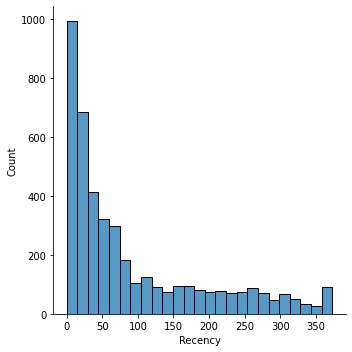

In [26]:
sns.displot(rfm_data, x="Recency")

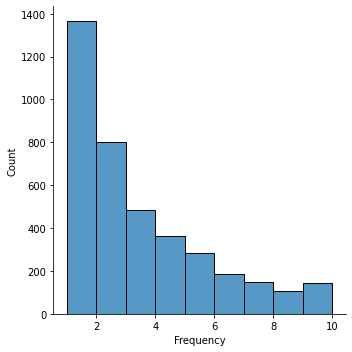

In [27]:
sns.displot(rfm_data, x="Frequency", bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

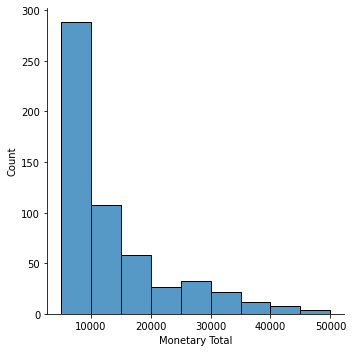

In [28]:
sns.displot(rfm_data, x="Monetary Total", bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])

## Clustering by Kmeans

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Use the Elbow Method to find the optimal number of clusters 

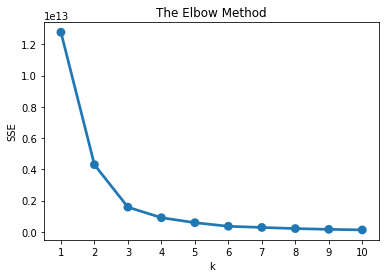

In [30]:
sse = {}

for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)    
    kmeans.fit(rfm_data)    
    sse[k] = kmeans.inertia_ 
    
# Plot SSE for each value of k    
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

on the graph above, k = 2 is optimal

### Check with the Silhouette Method to find optimal K

For n_clusters = 2 The average silhouette_score is : 0.9917598347472959
For n_clusters = 3 The average silhouette_score is : 0.9831509518494493
For n_clusters = 4 The average silhouette_score is : 0.9614990800347535
For n_clusters = 5 The average silhouette_score is : 0.9585751687332583
For n_clusters = 6 The average silhouette_score is : 0.9178238548956895
For n_clusters = 7 The average silhouette_score is : 0.8678701581026461
For n_clusters = 8 The average silhouette_score is : 0.8691449381719205
For n_clusters = 9 The average silhouette_score is : 0.8676548743934709
For n_clusters = 10 The average silhouette_score is : 0.8674477219784374


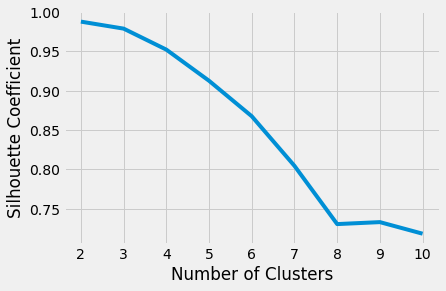

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_data, cluster_labels)
    
    
kmeans_kwargs={
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}
silhouette_coefficients=[]
#Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans=KMeans (n_clusters = k, **kmeans_kwargs)
    kmeans.fit(rfm_data)
    score=silhouette_score(rfm_data, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range (2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

based on Shilhouette score and the graph above, with a maximum Silhouette score so K = 2 is optimal

In [32]:
kmeans = KMeans(n_clusters = 2)
model = kmeans.fit(rfm_data)
# pred = model.labels_
# df_dup["Cluster"] = pred
# df_dup["Description", "Cluster"]
new_df = rfm_data.assign(Cluster = kmeans.labels_)
new_df1 = new_df.groupby(["Cluster"])
new_df1 = new_df1.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Total': 'mean'
  }).round(2)
new_df1

,Recency,Frequency,Monetary Total
Cluster,,,
0,90.45,4.76,5413.73
1,1.80,118.20,1308507.38


In [33]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [34]:
y_predicted = km.fit_predict(rfm_data[['Frequency', 'Monetary Total']]) 
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
rfm_data['cluster']=y_predicted
rfm_data.head()

,Recency,Frequency,Monetary Total,cluster
CustomerID,,,,
12347,1,7,11323.81,0
12348,74,4,2181.64,0
12349,18,1,1457.55,0
12350,309,1,294.40,0
12352,35,8,2122.87,0


In [36]:
rfm_data["cluster"].value_counts()

0    4317
1       5
Name: cluster, dtype: int64

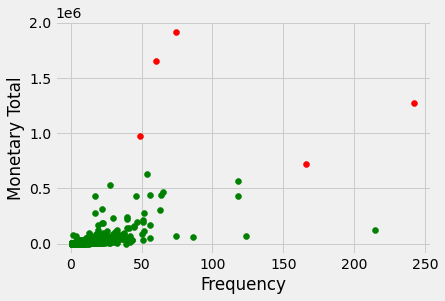

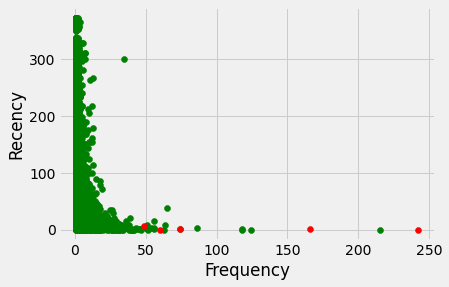

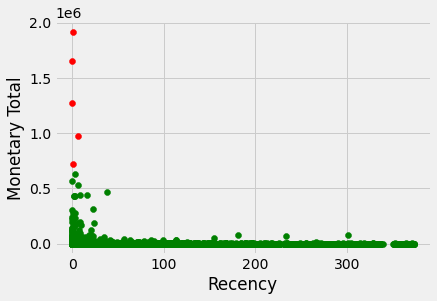

In [37]:
import matplotlib.pyplot as plt
rfm_data1 =rfm_data[y_predicted==0]
rfm_data2 =rfm_data[y_predicted==1]

plt.scatter(rfm_data1["Frequency"], rfm_data1["Monetary Total"], color='green')
plt.scatter(rfm_data2["Frequency"], rfm_data2["Monetary Total"], color='red')
plt.xlabel('Frequency')
plt.ylabel('Monetary Total')
plt.show()

plt.scatter(rfm_data1["Frequency"], rfm_data1["Recency"], color='green')
plt.scatter(rfm_data2["Frequency"], rfm_data2["Recency"], color='red')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()

plt.scatter(rfm_data1["Recency"], rfm_data1["Monetary Total"], color='green')
plt.scatter(rfm_data2["Recency"], rfm_data2["Monetary Total"], color='red')
plt.xlabel('Recency')
plt.ylabel('Monetary Total')
plt.show()

## Clustering by DBSCAN

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

### because data have some outliers with big value so need to use Standardscaler() to scale data down

In [39]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(rfm_data) 
scaled_X

array([[-0.89538579,  0.23411401,  0.08096251, -0.03403251],
       [-0.16385891, -0.09872834, -0.08716071, -0.03403251],
       [-0.72503022, -0.4315707 , -0.10047662, -0.03403251],
       ...,
       [-0.8352603 , -0.2096758 , -0.12380379, -0.03403251],
       [-0.87534396,  1.23264108,  0.08053623, -0.03403251],
       [-0.48452823, -0.2096758 , -0.07658065, -0.03403251]])

In [40]:
number_of_outliers=[]
percentage_of_outliers=[]
#min_samples starting point:2*no.of dimension
min_samples = 2 * scaled_X.shape[1]
for eps in np.linspace(0.001, 3, 50):
   #model creation
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_X)
   #Number of clusters
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
   #Percentage of points classified as outliers
    perc_outliers=100*np.sum(dbscan.labels_==-1) / len(dbscan.labels_)
    percentage_of_outliers.append (perc_outliers)

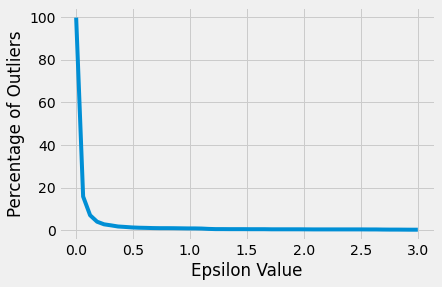

In [41]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=percentage_of_outliers);
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers');

Percentage of Outliers start to fall low with Epsilon value approximate 0.25

In [42]:
min_samples=2*scaled_X.shape[1]
dbscan = DBSCAN(eps=0.2, min_samples=min_samples) 

In [43]:
dbscan.fit(scaled_X)

DBSCAN(eps=0.2, min_samples=8)

In [44]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

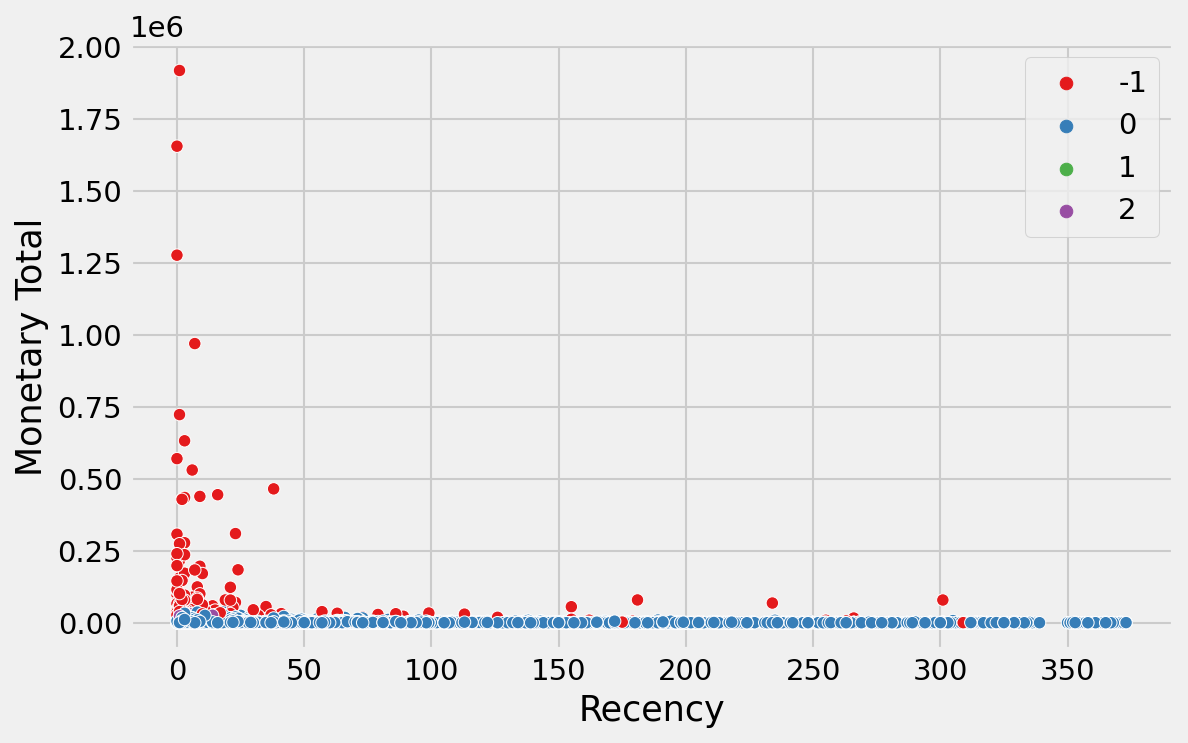

In [45]:
plt.figure(figsize = (8,5), dpi=150)
sns.scatterplot(data=rfm_data, x = "Recency", y = "Monetary Total", hue = dbscan.labels_,  palette='Set1');

### The graph show that the higher Recency, the lower Monetary Total. That is means the main source of revenue comes from customers who rarely buy but buy in bulk, maybe is an agency or from supermarket chain 

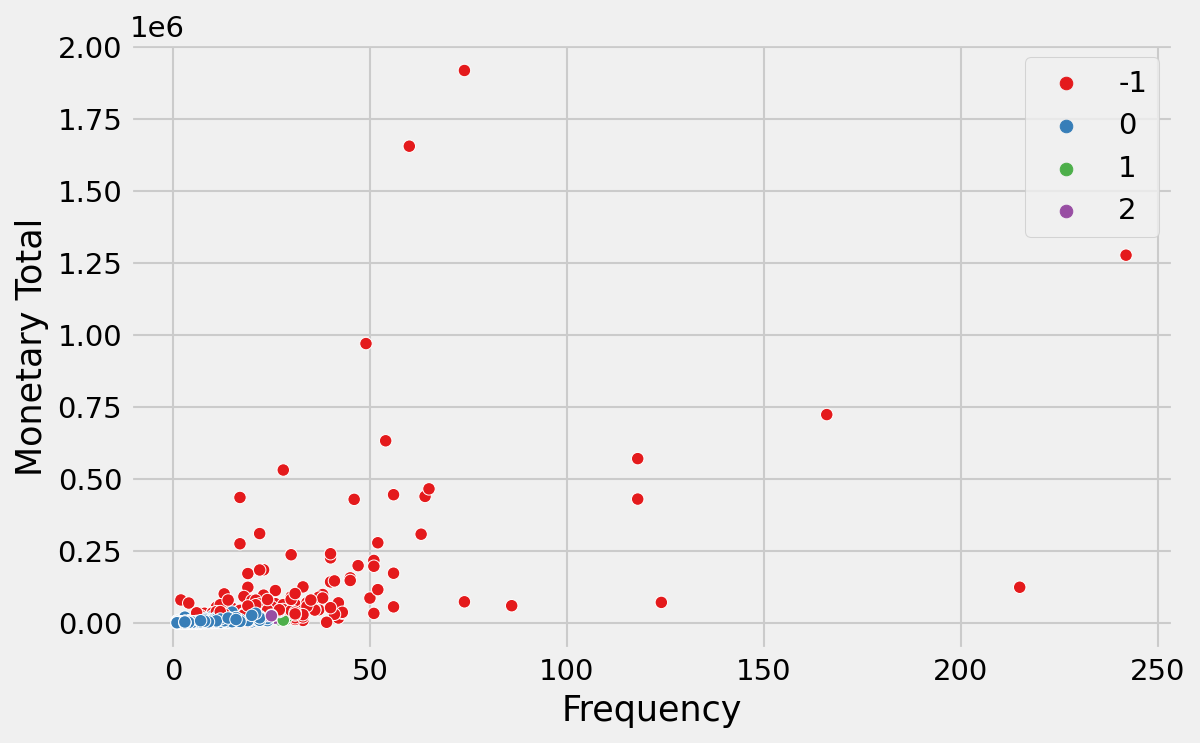

In [46]:
plt.figure(figsize = (8,5), dpi=150)
sns.scatterplot(data=rfm_data, x = "Frequency", y = "Monetary Total", hue = dbscan.labels_,  palette='Set1');

### The graph above show that Monetary Total increase based on Frequency

In [47]:
rfm_data1 = rfm_data

In [48]:
rfm_data1["Label"] = dbscan.labels_
rfm_data1

,Recency,Frequency,Monetary Total,cluster,Label
CustomerID,,,,,
12347,1,7,11323.81,0,0
12348,74,4,2181.64,0,0
12349,18,1,1457.55,0,0
12350,309,1,294.40,0,0
12352,35,8,2122.87,0,0
...,...,...,...,...,...
18280,277,1,180.60,0,0
18281,180,1,80.82,0,0
18282,7,3,189.07,0,0


In [49]:
rfm_data1["Label"].value_counts()

 0    4148
-1     151
 2      15
 1       8
Name: Label, dtype: int64

## Convert Country to Continent

In [50]:
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price
0,578551,12937,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69
1,571270,12940,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97
2,579533,12953,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85
3,581015,13949,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42
4,580876,14071,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42
...,...,...,...,...,...,...
21129,555267,16359,84836,2011-06-01 16:15:00,United Kingdom,740.21
21130,571319,17164,23145,2011-10-17 10:50:00,United Kingdom,21.85
21131,562050,14133,23144,2011-08-02 11:34:00,United Kingdom,19.92
21132,552135,14944,23144,2011-05-06 11:51:00,United Kingdom,59.76


In [51]:
import pycountry_convert as pc

In [52]:
def convert(row):
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format = "default")
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

In [53]:
df_dup2['Country'].value_counts()

United Kingdom          18982
Germany                   556
France                    426
EIRE                      311
Belgium                   119
Spain                      97
Netherlands                95
Australia                  64
Switzerland                64
Portugal                   52
Italy                      46
Finland                    44
Sweden                     40
Norway                     34
Channel Islands            30
Japan                      26
Poland                     24
Denmark                    21
Austria                    19
Cyprus                     17
Malta                       9
Unspecified                 8
Iceland                     7
Israel                      5
Greece                      5
Canada                      5
Lithuania                   4
Czech Republic              4
European Community          4
Singapore                   4
USA                         3
Saudi Arabia                2
United Arab Emirates        2
Bahrain   

### Check all country names in the data set belong to, correct or not in data files in the library. Then, replace it or drop it if necessary to convert into continent

In [56]:
df_dup2["Continent"] = df_dup2.apply(convert, axis = 1)
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price,Continent
0,578551,12937,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69,EU
1,571270,12940,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97,EU
2,579533,12953,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85,EU
3,581015,13949,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42,EU
4,580876,14071,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42,EU
...,...,...,...,...,...,...,...
21129,555267,16359,84836,2011-06-01 16:15:00,United Kingdom,740.21,EU
21130,571319,17164,23145,2011-10-17 10:50:00,United Kingdom,21.85,EU
21131,562050,14133,23144,2011-08-02 11:34:00,United Kingdom,19.92,EU
21132,552135,14944,23144,2011-05-06 11:51:00,United Kingdom,59.76,EU


In [55]:
df_dup2['Country'] = df_dup2['Country'].replace({'EIRE': 'Ireland'})
df_dup2['Country'] = df_dup2['Country'].replace({'Channel Islands': 'France'})
df_dup2 = df_dup2.drop(df_dup2[df_dup2["Country"] == "Unspecified"].index)
df_dup2 = df_dup2.drop(df_dup2[df_dup2["Country"] == "European Community"].index)
df_dup2['Country'] = df_dup2['Country'].replace({'RSA': 'Lesotho'})

In [ ]:
df_count = df_dup2["Continent"].value_counts()
df_count

EU    20989
OC       64
AS       59
NA        8
AF        1
SA        1
Name: Continent, dtype: int64

In [ ]:
percentage = df_count[0]/len(df_dup2["Continent"])*100
print("Percentage of Customer in EU: " + str(percentage))

Percentage of Customer in EU: 99.37032477985039


## Almost of the customers are from EU (approximate 99%)

In [ ]:
# df_dup2.to_csv("after processing4.csv", index = False)

## Fpgrowth

In [103]:
import pyfpgrowth
import numpy as np
import pandas as pd

In [104]:

dataset = pd.read_csv('after processing4.csv', header=None)
transactions=[]
for sublist in dataset.values.tolist():
    clean_sublist = [item for item in sublist if item is not np.NaN] 
    transactions.append(clean_sublist)
transactions   

[['InvoiceNo', 'CustomerID', 'All Stock Code'],
 ['536365', '17850', '85123A, 71053, 84406B, 84029G, 84029E, 22752, 21730'],
 ['536366', '17850', '22633, 22632'],
 ['536367',
  '13047',
  '84879, 22745, 22748, 22749, 22310, 84969, 22623, 22622, 21754, 21755, 21777, 48187'],
 ['536368', '13047', '22960, 22913, 22912, 22914'],
 ['536369', '13047', '21756'],
 ['536370',
  '12583',
  '22728, 22727, 22726, 21724, 21883, 10002, 21791, 21035, 22326, 22629, 22659, 22631, 22661, 21731, 22900, 21913, 22540, 22544, 22492, POST'],
 ['536371', '13748', '22086'],
 ['536372', '17850', '22632, 22633'],
 ['536373',
  '17850',
  '85123A, 71053, 84406B, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494L, 84029G, 84029E, 22752, 21730'],
 ['536374', '15100', '21258'],
 ['536375',
  '17850',
  '85123A, 71053, 84406B, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494L, 84029G, 84029E, 22752, 21730'],
 ['536376', '15291', '22114, 21733'],
 ['536377', '17850', '22632, 22633'],
 ['536378

In [109]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 3) 
df_patterns = pd.DataFrame([patterns])
df_patterns = df_patterns.transpose()
df_patterns = df_patterns.reset_index()
df_patterns.columns = ["Iten Set","Count"]
df_patterns.head()

,Iten Set,Count
0,"(22633, 22632,)",3
1,"(21756,)",3
2,"(15100,)",3
3,"(15100, 21258)",3
4,"(17420,)",3


### find frequent patterns of itemset to prepare for association rules

In [110]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.5) 
df_rules = pd.DataFrame([rules])
df_rules = df_rules.transpose()
df_rules = df_rules.reset_index()
df_rules.columns = ["Subject","Association, Probability Rate"]
df_rules.head()

,Subject,"Association, Probability Rate"
0,"(15100,)","((21258,), 1.0)"
1,"(21258,)","((15100,), 0.6)"
2,"(85123A, 71053, 84406B, 37370, 21871, 21071, 2...","((17850,), 1.0)"
3,"(17616,)","((85123A,), 1.0)"
4,"(18017,)","((85099B,), 1.0)"


### According data above:
- For first row, corresponding with CustomerID = 15100, they will buy Item with StockCode = 21258 in all cases so the probability rate is 1.0
- For second row, opposite of the above example, also with StockCode = 21258 but it is bought by many people (include CustomerID 15100), so the probability rate í 0.6